* PassengerId: type should be integers
* Survived: Survived or Not
* Pclass: Class of Travel
* Name: Name of Passenger
* Sex: Gender
* Age: Age of Passengers
* SibSp: Number of Sibling/Spouse aboard
* Parch: Number of Parent/Child aboard
* Ticket: Ticket number
* Fare: Fare for ticket
* Cabin: Cabin Number
* Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [5]:
#import data
data = pd.read_csv("BDs/titanic-passengers.csv",delimiter=";")

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data = data.drop("Cabin",axis=1)

In [11]:
#fill with the mode
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [12]:
#fill with mean
data['Age'] = data['Age'].replace(np.nan, data.Age.mean())

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
 #replace male as 1 and female as 0
data["Sex"] = data["Sex"].map({"male": 1, "female":0})

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Survived"] = le.fit_transform(data["Survived"].values)

In [16]:
data["Embarked"] = le.fit_transform(data["Embarked"].values)

In [17]:
# drop non usefull variables
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [18]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2


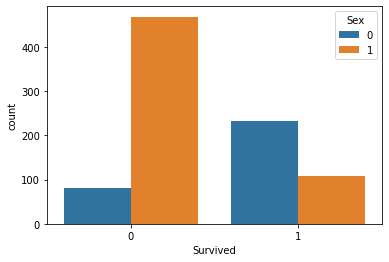

In [19]:
sns.countplot(x='Survived',hue = 'Sex' ,data=data)
plt.show()

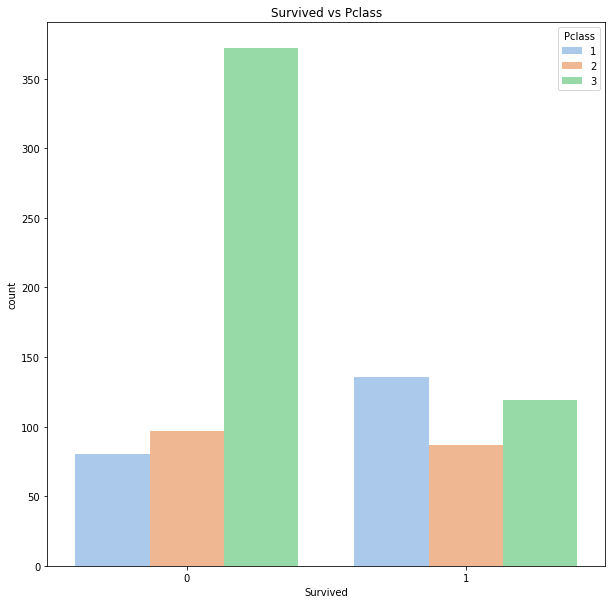

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='Survived', hue='Pclass', data=data, palette='pastel')
plt.title('Survived vs Pclass')
plt.show()

In [21]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


In [22]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    mask = np.triu(np.ones_like(corr, dtype=bool))


    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True,
        mask = mask,

        annot_kws = { 'fontsize' : 12 }

        )

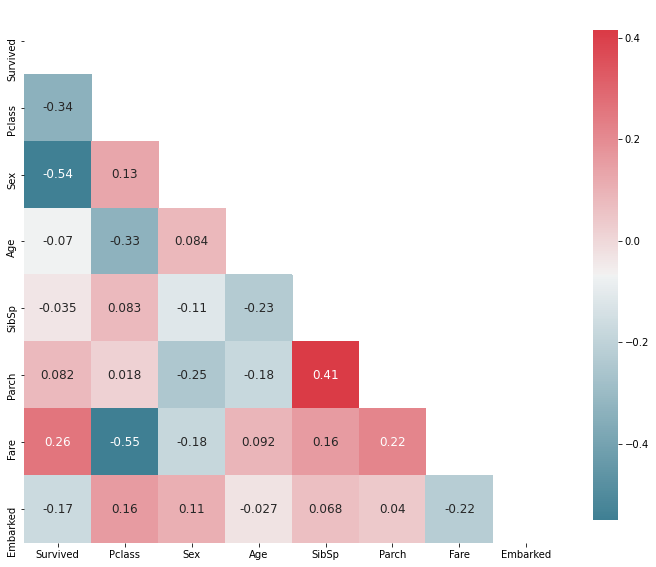

In [51]:
plot_correlation_map(data)

In [25]:
#features extraction
x = data[['Sex', 'Pclass']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


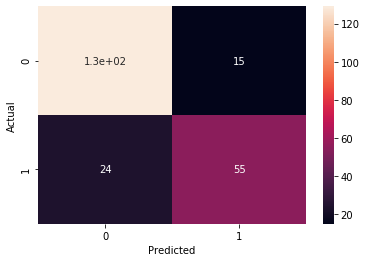

In [26]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

AUC Score: 0.82


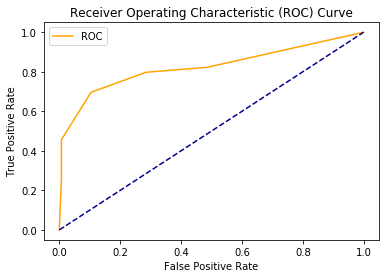

In [38]:
pred_prob = logreg.predict_proba(x_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)


fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()